In [2]:
import psycopg2
from sqlalchemy import create_engine
import pandas as pd

In [2]:
d = {'氏名':["高橋", "伊藤", "渡辺", "加藤"],
     '出席番号':[ "a001", "a002", "a005", "a006"],
     '国語':[5,6,7,8],}
df = pd.DataFrame(data=d).set_index('氏名')
df             
                    

,出席番号,国語
氏名,,
高橋,a001,5
伊藤,a002,6
渡辺,a005,7
加藤,a006,8


In [8]:
connection_config = {
    'user':'XXX',
    'password':'XXX',
    'host':'127.0.0.1',
    'port':'5432',
    'database':'DB_1'
}

In [9]:
engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{database}'
                       .format(**connection_config))

In [10]:
df.to_sql('mori_1', con=engine, if_exists='replace')

4

In [14]:
df = pd.DataFrame({'氏名':['高橋', '伊藤', '鈴木', '佐藤'],
                  '出席番号':['a001', 'a002', 'a005', 'a006'],
                 '数学':[1,2,3,4]}).set_index('氏名')

In [15]:
df

,出席番号,数学
氏名,,
高橋,a001,1
伊藤,a002,2
鈴木,a005,3
佐藤,a006,4


In [16]:
df.to_sql('mori_2', con=engine, if_exists='replace')

4

In [20]:
df = pd.read_csv(r"C:\\Program Files\\PostgreSQL\\16\\pgAdmin 4\\runtime\\table_data.csv")

In [21]:
df.head(5)

,ID,buyday,personID,Classification,itemname,uniprice,volume,sales
0,1,2020/1/4,a023,ボトムス,ロングパンツ,7000,8,56000
1,2,2020/1/5,a003,ボトムス,ジーンズ,6000,10,60000
2,3,2020/1/5,a052,アウター,ジャケット,10000,7,70000
3,4,2020/1/6,a003,ボトムス,ロングパンツ,7000,10,70000
4,5,2020/1/7,a036,ボトムス,ロングパンツ,7000,2,14000


In [22]:
df = df.set_index('ID')

In [23]:
df.head(5)

,buyday,personID,Classification,itemname,uniprice,volume,sales
ID,,,,,,,
1,2020/1/4,a023,ボトムス,ロングパンツ,7000,8,56000
2,2020/1/5,a003,ボトムス,ジーンズ,6000,10,60000
3,2020/1/5,a052,アウター,ジャケット,10000,7,70000
4,2020/1/6,a003,ボトムス,ロングパンツ,7000,10,70000
5,2020/1/7,a036,ボトムス,ロングパンツ,7000,2,14000


In [ ]:
df = pd.read_sql(sql = 'SELECT * FROM mori_2;', con=engine)

In [24]:
df

,buyday,personID,Classification,itemname,uniprice,volume,sales
ID,,,,,,,
1,2020/1/4,a023,ボトムス,ロングパンツ,7000,8,56000
2,2020/1/5,a003,ボトムス,ジーンズ,6000,10,60000
3,2020/1/5,a052,アウター,ジャケット,10000,7,70000
4,2020/1/6,a003,ボトムス,ロングパンツ,7000,10,70000
5,2020/1/7,a036,ボトムス,ロングパンツ,7000,2,14000
...,...,...,...,...,...,...,...
220,2020/12/26,a052,アウター,ダウン,18000,4,72000
221,2020/12/28,a036,アウター,ダウン,18000,3,54000
222,2020/12/30,a003,アウター,ダウン,18000,4,72000


In [25]:
df.sort_values(by = 'Classification', ascending = False)

,buyday,personID,Classification,itemname,uniprice,volume,sales
ID,,,,,,,
1,2020/1/4,a023,ボトムス,ロングパンツ,7000,8,56000
125,2020/8/20,a003,ボトムス,ロングパンツ,7000,5,35000
116,2020/8/3,a023,ボトムス,ジーンズ,6000,1,6000
118,2020/8/7,a003,ボトムス,ハーフパンツ,3000,1,3000
119,2020/8/8,a023,ボトムス,ロングパンツ,7000,5,35000
...,...,...,...,...,...,...,...
105,2020/7/14,a047,アウター,ジャケット,10000,9,90000
104,2020/7/14,a036,アウター,ダウン,18000,7,126000
141,2020/8/28,a003,アウター,ダウン,18000,4,72000


In [30]:
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

<BarContainer object of 3 artists>

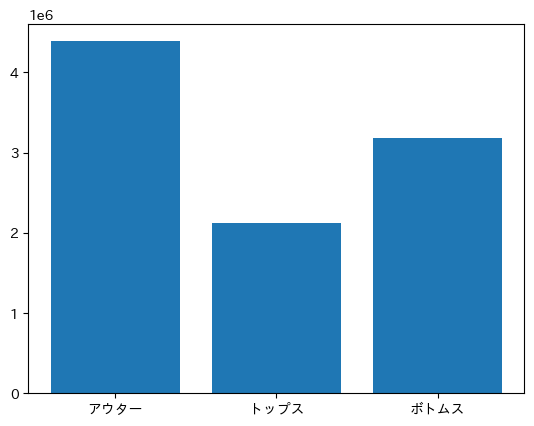

In [32]:
df_graph = df.pivot_table(values = 'sales', index = 'Classification',aggfunc = 'sum')
x = df_graph.index
y = df_graph['sales']
plt.bar(x,y)

In [34]:
f = lambda x: "１万円以上" if x > 10000 else "１万円未満"
df['金額判定'] = df['sales'].map(f)
df

,buyday,personID,Classification,itemname,uniprice,volume,sales,金額判定
ID,,,,,,,,
1,2020/1/4,a023,ボトムス,ロングパンツ,7000,8,56000,１万円以上
2,2020/1/5,a003,ボトムス,ジーンズ,6000,10,60000,１万円以上
3,2020/1/5,a052,アウター,ジャケット,10000,7,70000,１万円以上
4,2020/1/6,a003,ボトムス,ロングパンツ,7000,10,70000,１万円以上
5,2020/1/7,a036,ボトムス,ロングパンツ,7000,2,14000,１万円以上
...,...,...,...,...,...,...,...,...
220,2020/12/26,a052,アウター,ダウン,18000,4,72000,１万円以上
221,2020/12/28,a036,アウター,ダウン,18000,3,54000,１万円以上
222,2020/12/30,a003,アウター,ダウン,18000,4,72000,１万円以上


In [46]:
df = pd.read_csv(r"C:\\Program Files\\PostgreSQL\\16\\pgAdmin 4\\runtime\\table_data.csv")
df.head(5)

,ID,buyday,personID,Classification,itemname,uniprice,volume,sales
0,1,2020/1/4,a023,ボトムス,ロングパンツ,7000,8,56000
1,2,2020/1/5,a003,ボトムス,ジーンズ,6000,10,60000
2,3,2020/1/5,a052,アウター,ジャケット,10000,7,70000
3,4,2020/1/6,a003,ボトムス,ロングパンツ,7000,10,70000
4,5,2020/1/7,a036,ボトムス,ロングパンツ,7000,2,14000


ここから、基礎に返る。Pythonを使用して、jupyterのエディターを介して、postgreSQLのテーブル操などを行う。

まず接続してテーブルそのままを得る。

In [ ]:
#パスなどを変数に格納（辞書型が理解しやすい。）
connection_config = {
    'user':'XXX',
    'password':'XXX',
    'host':'127.0.0.1',
    'port':'5432',
    'database':'DB_1'
}
#アルケミーを使わずに接続もできるが、アルケミーを使った方が他の接続と競合しない。今回はSQLightとなぜか競合した。
engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{database}'
                       .format(**connection_config))
#ここでやっとクエリを設定する。なぜか大文字で入力しても、小文字に変換されるため、"T_main"として大文字でも小文字でも問題ない設定とした。
#「%s」というのは、paramsに渡すための記号
query = 'SELECT * FROM "T_main" WHERE "Classification" = %s'
params = ('ボトムス',)
#pnadasを利用して、表にしていく。変数resultにread_sql_query（決まり文句）を入れ込む。
result = pd.read_sql_query(query, engine, params=params)
print(result)